In [1]:
from pyALT import *
import pyALT.io as io
from matplotlib import pyplot as plt
G = io.load('meso_cortex.pk')

In [2]:
from collections import defaultdict

In [3]:
G.node['AUDp']

{'majorRegion': 'Isocortex',
 'name': 'Primary auditory area',
 'normSize': 8.0,
 'voxels': 2689}

In [4]:
L = ALT(G)
thresholds = {'VISp':4,'AUDp':1,'GU':2.5,'SSp-ul':2.5,'SSp-tr':2.5,
              'SSp-m':4,'SSp-bfd':4,'SSp-ll':1.5,'SSp-n':0.98,'MOB':0.46}
srcs = ['SSp-n','AUDp','VISp','GU','SSp-ul','SSp-tr','SSp-m','SSp-bfd','SSp-ll','MOB']
for src in srcs:
    L.add_source(src)
    L.set_theta(src,0.98)
L.set_theta('MOB',0.46)
L.run()
L.form_paths()
pc = L.path_centrality()
core = L.core(100)

In [5]:
L.adag_node_locations()

In [6]:
L.locations()

In [7]:
L('SSp-bfd').node['SSs']

{'activation_time': 1550.2016, 'c': 1, 'g': 12, 'level': 1, 'reach': 20}

In [9]:
l = [xx['c']/(xx['g']+xx['c']) for xx in L.loc.values()]
g = [xx['g'] for xx in L.loc.values()]
c = [xx['c'] for xx in L.loc.values()]

Text(0.5,0,'Complexity')

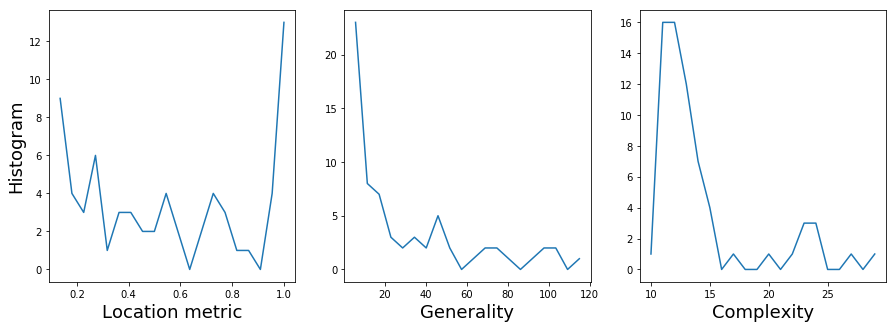

In [10]:
fig, ax = pl.subplots(1,3,figsize=(15,5))
f,e = np.histogram(l, bins=20)
ax[0].plot(e[1:],f)
ax[0].set_xlabel('Location metric',fontsize=18)
ax[0].set_ylabel('Histogram',fontsize=18)

f,e = np.histogram(g, bins=20)
ax[1].plot(e[1:],f)
ax[1].set_xlabel('Generality',fontsize=18)

f,e = np.histogram(c, bins=20)
ax[2].plot(e[1:],f)
ax[2].set_xlabel('Complexity',fontsize=18)

In [11]:
print('Source Complexity Generality Location')
for w in L.srcs:
    g = L.loc[w]['g']
    c = L.loc[w]['c']
    l = c/(g+c)
    print(w,c,g,f'{l:.3f}')

Source Complexity Generality Location
SSp-n 10 72 0.122
AUDp 10 47 0.175
VISp 9 65 0.122
GU 10 99 0.092
SSp-ul 12 67 0.152
SSp-tr 10 73 0.120
SSp-m 13 78 0.143
SSp-bfd 10 59 0.145
SSp-ll 11 97 0.102
MOB 22 44 0.333


In [12]:
L.form_paths()

In [13]:
b = L.P.pathCentrality()

In [14]:
z = sorted(b.items(),key=lambda x:x[1],reverse=True)
z = [(xx[0],xx[1]/580) for xx in z]
for w in z:
    print(f'{w[0]}-{w[1]:.3f}')

CLA-0.214
SSs-0.197
PTLp-0.178
GU-0.178
SSp-ll-0.172
AUDv-0.167
SSp-m-0.150
SSp-n-0.134
SSp-tr-0.131
VISp-0.128
SSp-ul-0.121
MOB-0.114
SSp-bfd-0.110
MOs-0.102
PERI-0.098
AOB-0.097
AUDp-0.095
COAp-0.091
VISl-0.090
VISC-0.088
ENTm-0.083
ENTl-0.081
AIv-0.078
AIp-0.078
SUBv-0.069
ACAd-0.069
EPv-0.067
BLA-0.062
MOp-0.055
PA-0.050
LA-0.047
ECT-0.045
PAA-0.041
TT-0.040
AON-0.040
DG-0.038
CA3-0.038
VISpl-0.036
TR-0.036
POST-0.036
PIR-0.036
PAR-0.036
TEa-0.033
ORBl-0.031
CA2-0.031
AUDd-0.029
SUBd-0.024
EPd-0.024
COAa-0.024
CA1-0.024
AId-0.022
RSPv-0.021
RSPagl-0.021
PL-0.021
FRP-0.021
DP-0.021
ACAv-0.021
ORBvl-0.019
NLOT-0.019
ILA-0.019
BMA-0.019
VISpm-0.017
VISam-0.017
VISal-0.017
RSPd-0.017
PRE-0.017
ORBm-0.017


In [15]:
from collections import Counter

In [16]:
m,n = len(L.srcs), G.order()
Z = np.zeros((m,n))
for i,s in enumerate(L.srcs):
    for q,node in enumerate(G.nodes()):
        Z[i,q] = L(s).node[node]['c']

In [17]:
l = len(core)
colors = {}
his = 0
for node,_ in core:
    colors[node] = [his,his,his]
    his +=1/l
for node in L.srcs:
    colors[node] = [1,0,0]
for w in G.nodes():
    try:
        colors[w]
    except KeyError:
        colors[w]=[0,0,1]

In [18]:
L.srcs

['SSp-n',
 'AUDp',
 'VISp',
 'GU',
 'SSp-ul',
 'SSp-tr',
 'SSp-m',
 'SSp-bfd',
 'SSp-ll',
 'MOB']

In [19]:
Le = defaultdict(list)
for j,src in enumerate(L.srcs):
    adag = L(src)
    for w in adag.nodes():
        t = adag.node[w]['level']
        if w==src:continue
        Le[w] += [t]
Re = defaultdict(list)
for j,src in enumerate(L.srcs):
    adag = L(src)
    for w in adag.nodes():
        t = adag.node[w]['reach']
        if w==src:
            continue
        Re[w] += [t]
Co = defaultdict(list)
for j,src in enumerate(L.srcs):
    adag = L(src)
    for w in adag.nodes():
        if w==src:
            continue
        Co[w] += [adag.node[w]['c']]

In [20]:
srcs = ['SSp-m','SSp-ul','SSp-tr','SSp-ll','SSp-bfd','VISp','AUDp','GU','SSp-n','MOB']
import operator

In [21]:
def assign_colors(i,mx):
    nm = (i)/(mx)
    if nm>1:nm=1
    return [1-nm,1-nm,1-nm]

m,n = G.order(),len(L.adags)
Z=np.zeros((m,n,3))
Zh=np.zeros((n,m))
xl = [] 
tmp = [(w,np.mean(Le[w][0:-1]),-np.mean(Re[w][0:-1]),-np.mean(Co[w][0:-1])) for w in adag.nodes()]
final = sorted(tmp, key=operator.itemgetter(2,1,3))
for j,src in enumerate(srcs):
    xl +=[src] 
    adag = L(src)
    mx = sorted([adag.node[xx]['reach'] for xx in adag.nodes()],reverse=True)[1]
    for i,data in enumerate(final):
        node = data[0]
        Z[i,j,:]=assign_colors(adag.node[node]['reach'],mx)
        Zh[j,i]=adag.node[node]['reach']

Text(0,0.5,'')

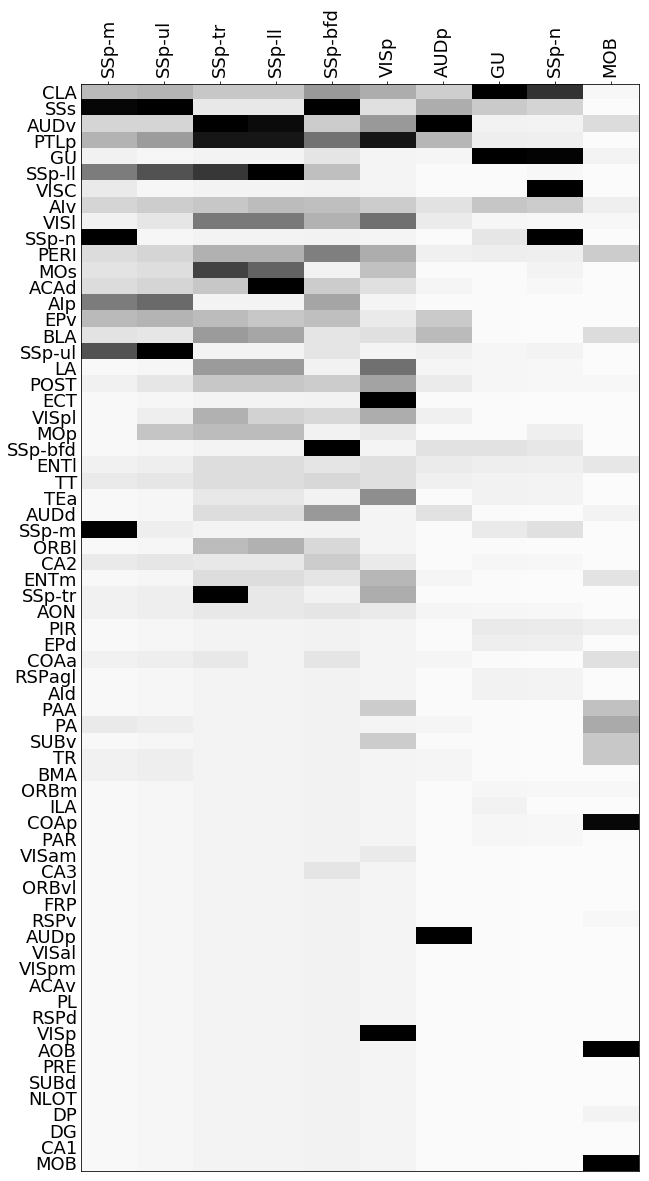

In [22]:
fig,ax = plt.subplots(figsize=(10,20))
ax.imshow(Z,aspect='auto')
ax.xaxis.tick_top()
ax.set_xticks(range(10))
ax.set_xticklabels(xl,fontsize=18,rotation='vertical')
ax.tick_params(axis=u'y', which=u'both',length=0)
ax.set_yticks(range(67))
ax.set_yticklabels([xx[0] for xx in final],fontsize=18)
ax.set_ylabel('',fontsize=18)

In [23]:
def assign_colors_(i,mx):
    if i==0:return [1,1,1]
    nm = (i-1)/(mx-1)
    if nm>1:nm=1
    return [1-nm,1-nm,1-nm]

m,n = G.order(),len(L.adags)
Z=np.zeros((m,n,3))
xl = [] 
tmp = [(w,np.mean(Le[w][0:-1]),-np.mean(Re[w][0:-1]),-np.mean(Co[w][0:-1])) for w in adag.nodes()]
final = sorted(tmp, key=operator.itemgetter(1,2,3))
for j,src in enumerate(srcs):
    xl +=[src] 
    adag = L(src)
    mx = sorted([adag.node[xx]['level'] for xx in adag.nodes()],reverse=True)[0]
    for i,data in enumerate(final):
        node = data[0]
        Z[i,j,:]=assign_colors_(adag.node[node]['level'],mx)

Text(0,0.5,'')

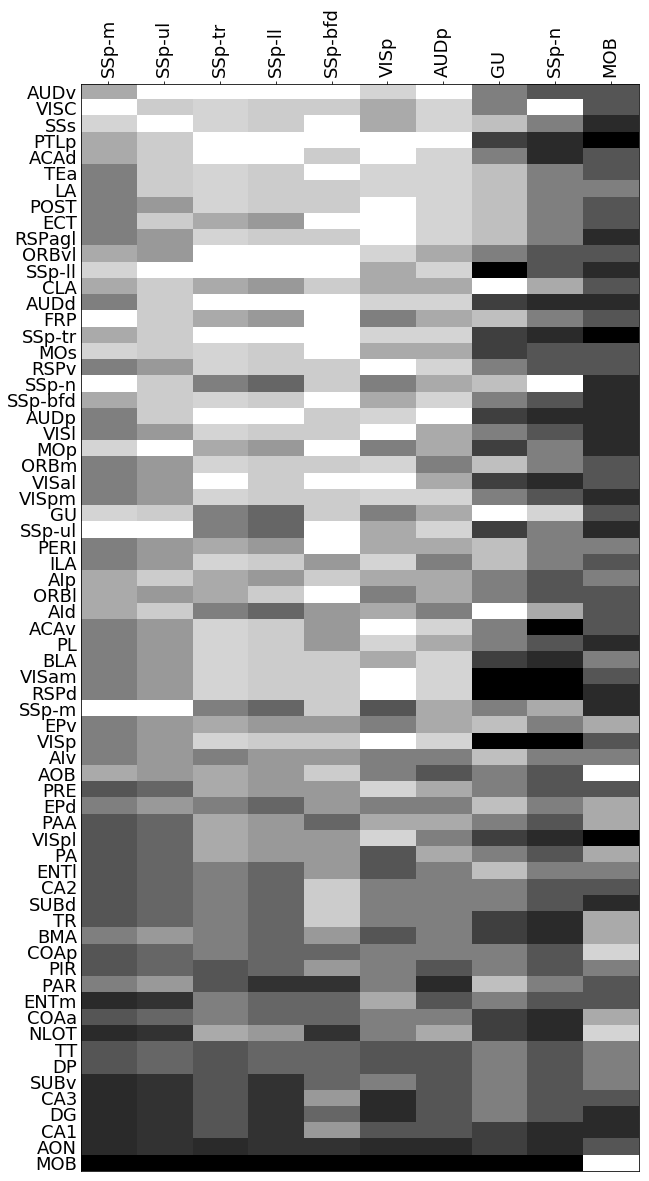

In [24]:
fig,ax = plt.subplots(figsize=(10,20))
ax.imshow(Z,aspect='auto')
ax.xaxis.tick_top()
ax.set_xticks(range(10))
ax.set_xticklabels(xl,fontsize=18,rotation='vertical')
ax.tick_params(axis=u'y', which=u'both',length=0)
ax.set_yticks(range(67))
ax.set_yticklabels([xx[0] for xx in final],fontsize=18)
ax.set_ylabel('',fontsize=18)

In [26]:
from scipy.spatial.distance import cosine

In [38]:
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.spatial.distance import pdist

In [35]:
z = np.array(Zh)
o = linkage(z,method='average')

In [54]:
srcs

['SSp-m',
 'SSp-ul',
 'SSp-tr',
 'SSp-ll',
 'SSp-bfd',
 'VISp',
 'AUDp',
 'GU',
 'SSp-n',
 'MOB']

In [56]:
# jaccard
dis = []
for j,src1 in enumerate(srcs):
    adag1 = L(src1)
    s1 = set(L(src1).edges())
    for i,src2 in enumerate(srcs):
        if i<=j:continue
        adag2 = L(src2)
        s2 = set(L(src2).edges())
        jac = len(s2.intersection(s1))/len(s2.union(s1))
        dis +=[1-jac]
print(len(dis))
o = linkage(dis, method='average')
X = np.zeros((10,G.size()))
for i,src in enumerate(srcs):
    adag = L(src)
    for j,e in enumerate(G.edges()):
        v,w = e
        try:
            adag[v][w]
            X[i,j] = 1
        except KeyError:
            pass

45


In [58]:
o

array([[ 7.        ,  8.        ,  0.18292683,  2.        ],
       [ 2.        ,  3.        ,  0.26506024,  2.        ],
       [ 0.        ,  1.        ,  0.30588235,  2.        ],
       [ 6.        , 11.        ,  0.63508535,  3.        ],
       [ 4.        , 12.        ,  0.64337111,  3.        ],
       [13.        , 14.        ,  0.66191447,  6.        ],
       [ 5.        , 15.        ,  0.76443858,  7.        ],
       [10.        , 16.        ,  0.82613529,  9.        ],
       [ 9.        , 17.        ,  0.95008567, 10.        ]])

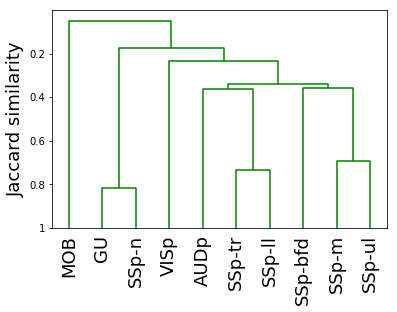

In [63]:
dendrogram(
    o,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
    labels =srcs,
    distance_sort='descending',
    color_threshold=1,
)
plt.yticks([0,.2,.4,.6,.8],[1,0.8,0.6,0.4,0.2])
plt.ylabel('Jaccard similarity',fontsize=18)
plt.show()

In [34]:
pp = []
q = 0
for i in range(9):
    for j in range(i+1,10):
        pp.append((srcs[i],srcs[j],dis[q]))
        q += 1

NameError: name 'dis' is not defined

In [91]:
tmp = sorted(pp,key=lambda x:1-x[-1],reverse=True)
with open('jaccards.csv','w') as f:
    for w in tmp:
        f.write(f'{w[0]},{w[1]},{1-w[2]:.2f}\n')